In [1]:
from pdVCF.pdVCF import VCF
import copy
import pandas as pd
import seaborn as sns

In [2]:
import time
s = time.time()

f = 'vcfs/testing4.vcf'
vcf = VCF(f)

print(time.time()-s)

/home/david/projects/pdVCF/pdVCF/vcf2dataframe.py:263: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop('UID', axis=1)


9.71928858757019


In [7]:
def ab_stuff(vcf, AB_list):

    data = []

    for ab in AB_list:
        v = copy.deepcopy(vcf)

        ab_min = "AB > {}".format( ab)
        ab_max = "AB <= {}".format(1)

        v.filter_vcf([ab_min, ab_max, 'DP >= 50', 'GQ >= 30', 'GT != 0/0', 'GT != ./.'], op='&', how='any')
        not_in_DB = len(v.vcf[v.vcf['ID'] == '.'])

        if v.vcf.shape[0] > 0:
            percent = not_in_DB / v.vcf.shape[0] * 100
            print("{}% ({}/{}) of variants are not in dbSNP for AB between {}-{}".format(round(percent, 2), not_in_DB, v.vcf.shape[0], 1, ab))
        else:
            print("0 variants after filtering for AB between {}-{}".format(ab_min, ab_max))
            pass

        data.append([ab, v.vcf.shape[0], not_in_DB, percent])




    df = pd.DataFrame(columns=['AB', 'No. Variants', 'Not in dbSNP', 'Percent'],
                      data=data)
    return df



In [8]:
df = ab_stuff(vcf, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


56.62% (265/468) of variants are not in dbSNP for AB between 1-0.1
36.8% (99/269) of variants are not in dbSNP for AB between 1-0.2
27.91% (60/215) of variants are not in dbSNP for AB between 1-0.3
19.43% (34/175) of variants are not in dbSNP for AB between 1-0.4
13.28% (17/128) of variants are not in dbSNP for AB between 1-0.5
14.29% (11/77) of variants are not in dbSNP for AB between 1-0.6
15.38% (8/52) of variants are not in dbSNP for AB between 1-0.7
9.09% (4/44) of variants are not in dbSNP for AB between 1-0.8
2.5% (1/40) of variants are not in dbSNP for AB between 1-0.9
0 variants after filtering for AB between AB > 1.0-AB <= 1


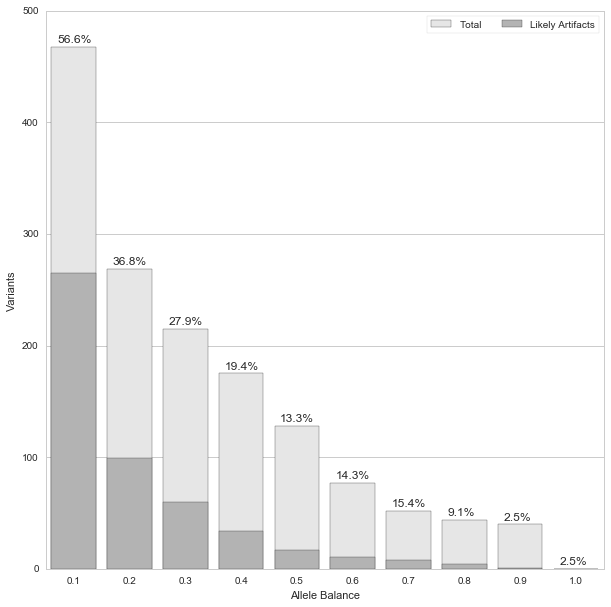

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# all vars
sns.set_color_codes("pastel")
sns.barplot(y="No. Variants", x="AB", data=df,
            label="Total", color="0.9")

# vars NOT in dbSNP
sns.set_color_codes("muted")
sns.barplot(y="Not in dbSNP", x="AB", data=df,
            label="Likely Artifacts", color="0.7")

ax.set(ylabel='Variants', xlabel='Allele Balance')
ax.legend(ncol=2, loc="upper right", frameon=True)


for x in range(len(df)):
    ax.text(x-0.3, ax.patches[x].get_height()+4, "{}%".format(round(df['Percent'].ix[x], 1)))

fig = ax.get_figure()
#fig.savefig('AB Series Present in dbSNP.TEST.png')


In [11]:
vcf.vcf

CHROM       POS           ID      REF  \
                                                                      
1:2160377-G/A                  1     2160377   .            G         
1:2160426-T/A                  1     2160426   .            T         
1:2160437-GC/G                 1     2160437   .            GC        
1:2160444-A/G,T                1     2160444   .            A         
1:2160453-C/T                  1     2160453   .            C         
1:2160458-G/A                  1     2160458   .            G         
1:2160463-G/A                  1     2160463   .            G         
1:2160473-T/C                  1     2160473   .            T         
1:2160474-T/C                  1     2160474   .            T         
1:2160485-T/C                  1     2160485   .            T         
1:2160491-C/T                  1     2160491   .            C         
1:2160494-T/C                  1     2160494   .            T         
1:2160499-C/G                  1     2160499   .            C         
1:2160504-G/A                  1     2160504   .            G         
1:2160517-A/G                  1     2160517   .            A         
1:2160521-G/A                  1     2160521   .            G         
1:2160523-A/G                  1     2160523   .            A         
1:2160530-A/G                  1     2160530   .            A         
1:2160535-C/T                  1     2160535   rs764373577  C         
1:2160553-A/C                  1     2160553   .            A         
1:2160571-T/C                  1     2160571   .            T         
1:2160572-C/T                  1     2160572   .            C         
1:2160580-G/A                  1     2160580   .            G         
1:2160582-T/C                  1     2160582   .            T         
1:2160583-T/C                  1     2160583   rs369090536  T         
1:2160593-G/A                  1     2160593   .            G         
1:2160596-C/T                  1     2160596   .            C         
1:2160599-C/T                  1     2160599   .            C         
1:2160608-T/C                  1     2160608   .            T         
1:2160610-G/A                  1     2160610   .            G         
...                           ..         ...  ..           ..         
3:30691741-CAATG/C,CG          3     30691741  .            CAATG     
3:30691742-AATG/A              3     30691742  .            AATG      
3:30691753-T/C                 3     30691753  .            T         
3:30691775-G/A                 3     30691775  rs766473954  G         
3:30691871-GA/GAA,G            3     30691871  .            GA        
3:30691967-CTTA/C              3     30691967  .            CTTA      
3:30691970-AAGGGT/AT,A         3     30691970  .            AAGGGT    
3:30691971-AGGGT/A             3     30691971  .            AGGGT     
3:30691972-GGGT/G              3     30691972  .            GGGT      
3:30691984-T/A                 3     30691984  .            T         
3:30691985-G/C                 3     30691985  .            G         
3:30713066-A/C                 3     30713066  .            A         
3:30713068-T/C                 3     30713068  .            T         
3:30713068-TTCC/T              3     30713068  .            TTCC      
3:30713069-T/C                 3     30713069  .            T         
3:30713069-TCCTGA/T            3     30713069  .            TCCTGA    
3:30713070-CCTGACA/CCA,C,CACA  3     30713070  .            CCTGACA   
3:30713071-CTGA/C              3     30713071  .            CTGA      
3:30713072-TGACA/T,TA          3     30713072  .            TGACA     
3:30713073-GACA/G              3     30713073  .            GACA      
3:30713075-CAGT/C              3     30713075  .            CAGT      
3:30713085-C/T                 3     30713085  .            C         
3:30713126-T/A                 3     30713126  rs11466512   T         
3:30713284-C/T                 3     30713284  rs76993